<a href="https://colab.research.google.com/github/pranayar/ASL/blob/main/ADS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


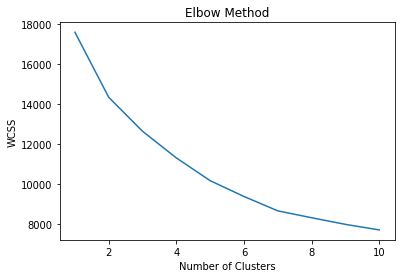

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

target = data['quality']
data = data.drop(['quality'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


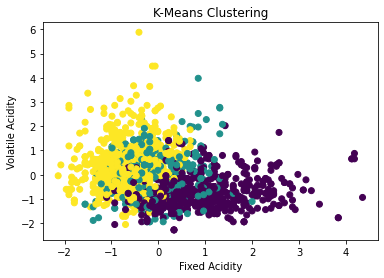

In [43]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
pred_y = kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=pred_y, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

In [42]:
from sklearn.metrics import adjusted_rand_score, mutual_info_score, silhouette_score

ri = adjusted_rand_score(target, pred_y)
ari = adjusted_rand_score(target, pred_y)
mi = mutual_info_score(target, pred_y)
sc = silhouette_score(scaled_data, pred_y)

print('Rand index:', ri)
print('Adjusted Rand index:', ari)
print('Mutual information:', mi)
print('Silhouette coefficient:', sc)

Rand index: 0.029215295725839783
Adjusted Rand index: 0.029215295725839783
Mutual information: 0.061795573559282446
Silhouette coefficient: 0.18921017006457752
